<a href="https://colab.research.google.com/github/dopedud/COMP3217-CW2/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP3217 COURSEWORK 2

## Import Modules

In [25]:
import numpy as np
import pandas as pd

### Upload and Read Files

In [26]:
# from google.colab import files
# uploaded = files.upload()

# read from uploaded files
multi_dataset_training = pd.read_csv('TrainingDataMulti.csv')
multi_X_testing = pd.read_csv('TestingDataMulti.csv')

## Data Pre-processing

### Separate Features and Labels

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split dataset to X training and Y training
multi_X_training = multi_dataset_training.iloc[:, :-1]
multi_Y_training = multi_dataset_training.iloc[:, -1]

### Data Composition

In [28]:
multi_dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(129)
memory usage: 5.9 MB


In [29]:
multi_dataset_training.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.0,6000.00000,6000.000000,6000.000000,6000.000000,6000.0,6000.0,6000.0,6000.0,6000.000000
mean,-19.882452,131378.347644,0.390396,131334.160186,2.848884,131662.268996,-20.667140,387.243103,-0.465448,387.995655,...,0.0,0.00100,0.001333,0.001167,0.001167,0.0,0.0,0.0,0.0,1.000000
std,100.297669,4818.458692,109.627647,2196.621540,99.307736,2292.258124,100.209885,113.079580,109.531209,83.530242,...,0.0,0.03161,0.036494,0.034139,0.034139,0.0,0.0,0.0,0.0,0.816565
min,-179.971773,30238.363620,-179.845722,34651.259140,-179.857182,29436.018980,-179.725401,0.000000,-179.994691,4.211530,...,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,-109.926250,131158.275400,-103.547798,130807.249600,-68.005793,131208.421900,-111.825605,317.695850,-103.675281,322.273600,...,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,-30.461301,131659.740800,1.930868,131383.934800,3.878925,131734.960600,-31.804887,384.439445,-0.429719,390.207410,...,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
75%,64.825877,132136.132900,101.287479,131910.473500,85.744566,132186.279400,62.780418,449.901270,99.551417,453.563470,...,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
max,179.943125,141638.902200,179.542055,140936.850700,179.960314,141714.122000,179.788427,1760.236430,179.988962,905.845170,...,0.0,1.00000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,2.000000


marker
0.0    2000
2.0    2000
1.0    2000
Name: count, dtype: int64


<Axes: >

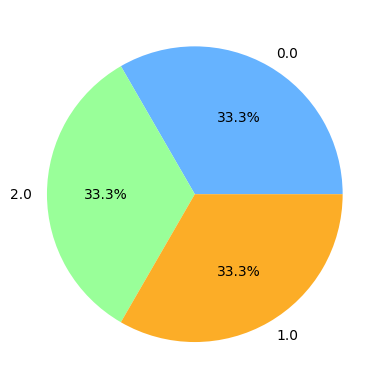

In [30]:
print(multi_Y_training.value_counts())

multi_Y_training.value_counts().plot(kind = 'pie', title = '', ylabel = '', autopct = '%1.1f%%', colors = ['#66b3ff','#99ff99', '#fcad27'])

### Standardising Data

In [31]:
# scale data on training set, then transform dataset from training set and testing set
scaler = StandardScaler()
multi_X_training = scaler.fit_transform(multi_X_training)
multi_X_training = pd.DataFrame(multi_X_training)
multi_X_testing = scaler.transform(multi_X_testing)
multi_X_testing = pd.DataFrame(multi_X_testing)

### Setup Validation Set

In [32]:
# further split dataset to training set and validation set
multi_X_training, multi_X_validation, multi_Y_training, multi_Y_validation = train_test_split(
    multi_X_training, multi_Y_training, test_size = .2, random_state = 42
)

## ML Training

In [33]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

# EDIT PARAMETERS HERE
parameter_grid_multi = {
    'n_estimators'      : [50, 100, 150, 200],
    'criterion'         : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : [2, 5, 10]
}

grid_search_multi = GridSearchCV(estimator = RandomForestClassifier(random_state = 42), param_grid = parameter_grid_multi, scoring = 'f1_macro', cv = 10, n_jobs = 3, verbose = 2)
grid_search_multi.fit(multi_X_training, multi_Y_training)

print("Best hyperparameters: ", grid_search_multi.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best hyperparameters:  {'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 50}


## Training Evaluation

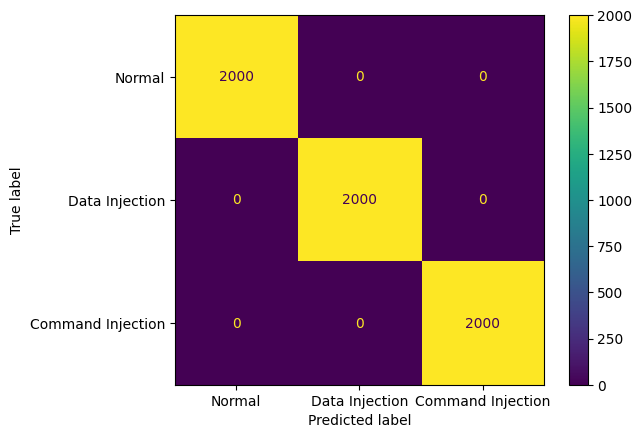


Accuracy score: 1.000
F1-score: 1.000

Precision score: 1.000
Recall score: 1.000

                   precision    recall  f1-score   support

           Normal       1.00      1.00      1.00      2000
   Data Injection       1.00      1.00      1.00      2000
Command Injection       1.00      1.00      1.00      2000

         accuracy                           1.00      6000
        macro avg       1.00      1.00      1.00      6000
     weighted avg       1.00      1.00      1.00      6000




In [34]:
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

# method to print classification metrics as well as generate a confusion matrix
# display from testing on validation set
def print_metrics(Y_test, predicted, labels):
    ConfusionMatrixDisplay(confusion_matrix(Y_test, predicted), display_labels = labels).plot()

    plt.show()

    print()

    print("Accuracy score: %.3f" % accuracy_score(Y_test, predicted))

    if (len(labels) > 2):
        print("F1-score: %.3f" % f1_score(Y_test, predicted, average = 'macro'))

        print()

        print("Precision score: %.3f" % precision_score(Y_test, predicted, average = 'macro'))
        print("Recall score: %.3f" % recall_score(Y_test, predicted, average = 'macro'))

    else:
        print("F1-score: %.3f" % f1_score(Y_test, predicted))

        print()

        print("Precision score: %.3f" % precision_score(Y_test, predicted))
        print("Recall score: %.3f" % recall_score(Y_test, predicted))

    print()

    print(classification_report(Y_test, predicted, target_names = labels))

    print()

print_metrics(multi_Y_training, grid_search_multi.predict(multi_X_training), ['Normal', 'Data Injection', 'Command Injection'])

## Output Test Set

In [35]:
# output prediction on test set
output_data = pd.read_csv('TestingDataMulti.csv')
multi_Y_testing = grid_search_multi.predict(multi_X_testing)
output_data.join(pd.DataFrame(multi_Y_testing, columns = ['marker'])).to_csv('TestingResultsMulti.csv', index = False)